# Writing a training loop from scratch
https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch

## Import libraries

In [1]:
# Python libraries
import os
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Using ipynb import functions defined in other nb
from ipynb.fs.defs.myfun_load_dataset import *
from ipynb.fs.full.myfun_models import *
from ipynb.fs.full.myfun_nn import *
from ipynb.fs.full.myfun_opt import *
from ipynb.fs.defs.myfun_plot import *

2023-08-27 23:42:15.187877: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow/Keras: 2.11.0
sklearn: 1.3.0


## Data Acquisition

In [2]:
# Load the dataset
par_dir = os.path.dirname(os.getcwd()) # parent dir
dir_name = par_dir + "/NN-interaction"
merged_df, dflist = load_dataset(dir_name, 'post')

## Create the model NN

In [3]:
# Create the model
DOE =[[1,2,1]] #Design of experiment
model = create_model(DOE[0])

## Training loop

In [4]:
NUM_EPOCHS = 100
nprint = 50
fmt = '{0:.02f}'

In [5]:
# Create the dataset using scene
df = dflist[0]
scn_list = seq2scn(df)

In [6]:
## FOR NN
LEARNING_RATE = 0.1

## FOR OPTIMIZING v0
LEARNING_RATE_v0 = 0.5

In [7]:
def solve_nn_df(df):
    
    info_df = []
    scn_list = seq2scn(df)

    for scn in scn_list:
    #for scn in scn_list:

        v0_scn = []

        tstamps = scn['Tarr']
        v0 = 30

        print("=="*50)
        print(f"\nScene n. {scn.name}, time interval:\
        [{fmt.format(tstamps[0])},{fmt.format(tstamps[-1])}]")

        for epoch in range(NUM_EPOCHS+1):

            t_list, x_list, _ = solve_nn_scn(model, scn, v0, LEARNING_RATE)
            _, x_list_matched = match_timestamps_scene(t_list, x_list)

            # Append v0 used, before to update it
            v0_scn.append(v0)

            # Update v0 with SGD
            v0_upd, loss_val, grads, g = SGD_v0(scn, x_list_matched, v0, LEARNING_RATE_v0)
            v0 = v0_upd

#             if epoch % nprint == 0:
#                 print("--"*50)
#                 print(f"Epoch n.{epoch}")

#                 # plot function
#                 t_ann_matched, trajs_ann_matched = match_timestamps_scene(t_list, x_list)
#                 tscale = 1+(tstamps[-1]-tstamps[0])/20000
#                 title = f"Scene n. {scn.name}, at epoch n.{epoch}"
#                 plot_scn(scn, trajs_ann_matched, title, xbal=0.01, ybal=0.05, scale=tscale)

#                 print(f"\n\
#                 Loss: {loss_val}\n\
#                 gradient to update v0: {g}\n\
#                 v0 updated: {v0}")
#                 print("--"*50)

        v0_scn_mean = np.array(v0_scn).mean()
        info_df.append([scn.name,v0_scn_mean])

        # plot function
        t_ann_matched, trajs_ann_matched = match_timestamps_scene(t_list, x_list)
        tscale = 1+(tstamps[-1]-tstamps[0])/20000
        title = f"Scene n. {scn.name}, at epoch n.{epoch}"
        plot_scn(scn, trajs_ann_matched, title, xbal=0.01, ybal=0.05, scale=tscale)

        print("=="*50)
    return info_df


Scene n. 0, time interval:        [14.24,14.64]


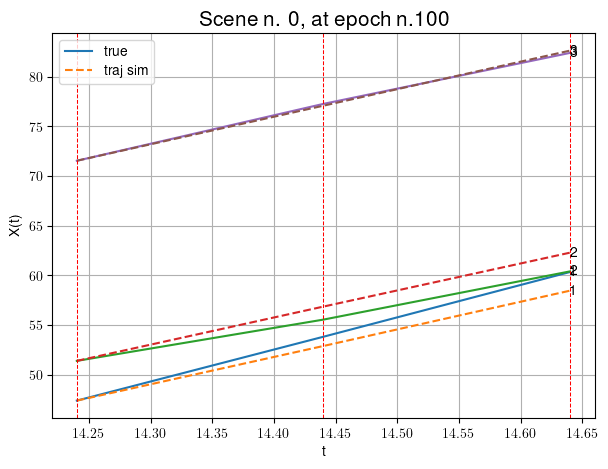


Scene n. 1, time interval:        [23.64,24.64]


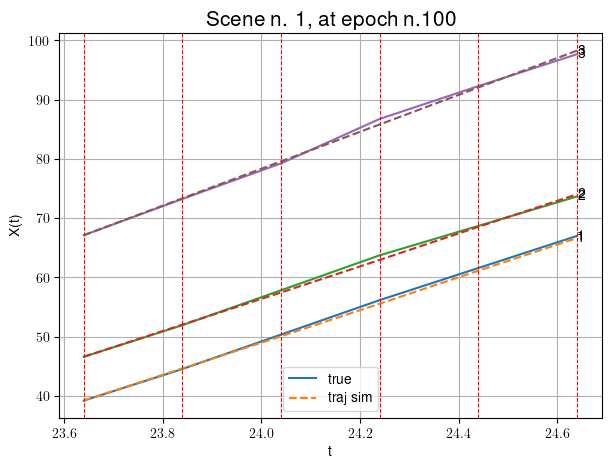


Scene n. 2, time interval:        [72.44,73.44]


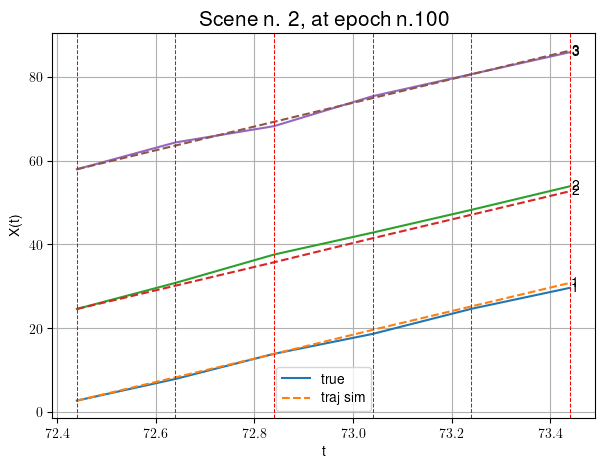


Scene n. 3, time interval:        [84.24,84.84]


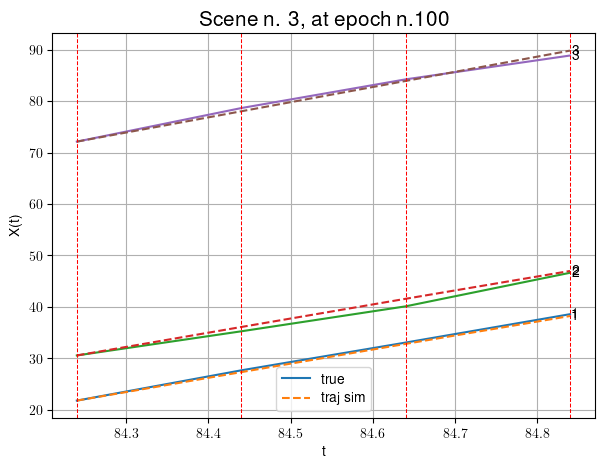


Scene n. 4, time interval:        [131.64,132.04]


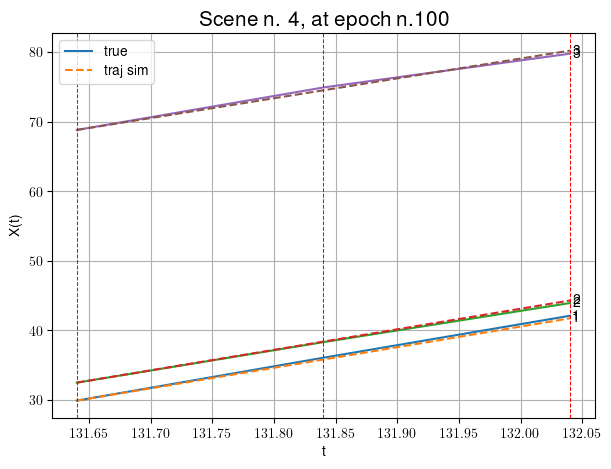


Scene n. 5, time interval:        [148.04,148.44]


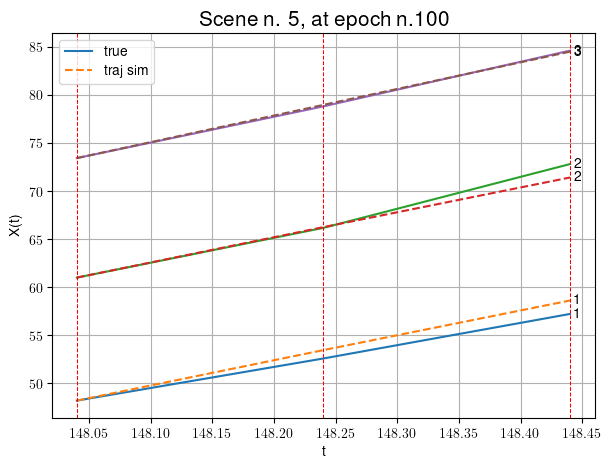


Scene n. 6, time interval:        [161.64,162.04]


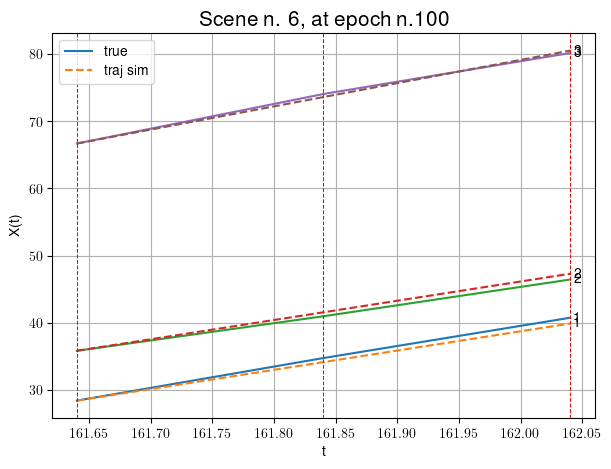


Scene n. 7, time interval:        [164.04,164.64]


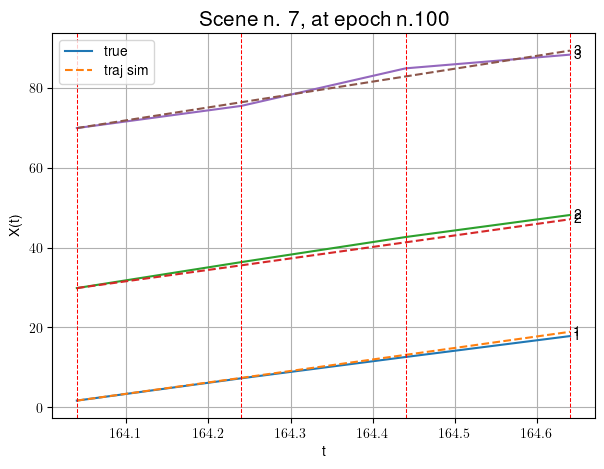


Scene n. 8, time interval:        [215.64,216.04]


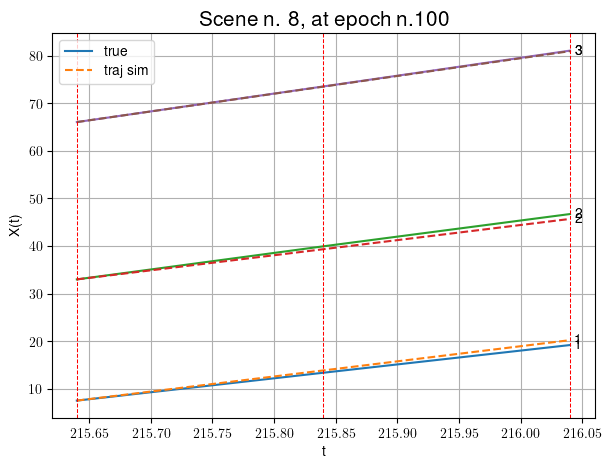


Scene n. 9, time interval:        [216.64,217.04]


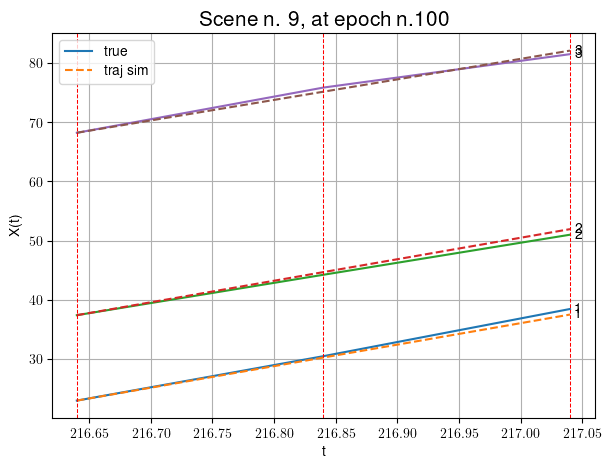


Scene n. 10, time interval:        [240.64,241.04]


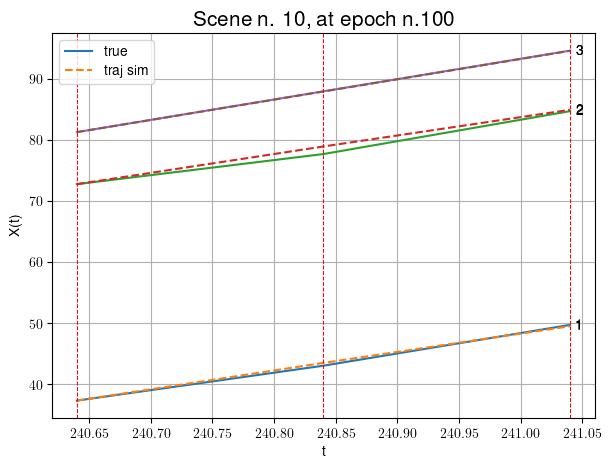


Scene n. 11, time interval:        [253.64,254.04]


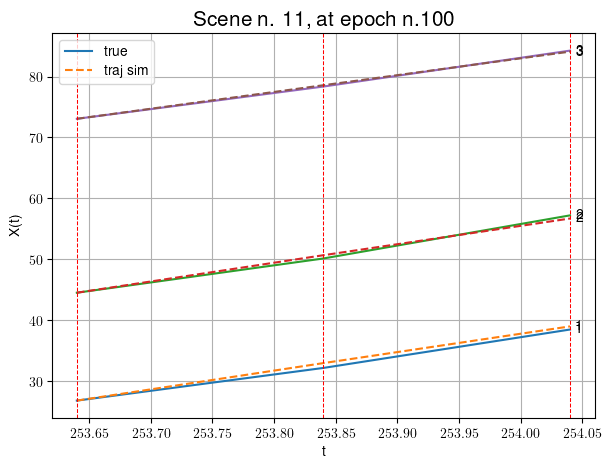


Scene n. 12, time interval:        [262.64,263.64]


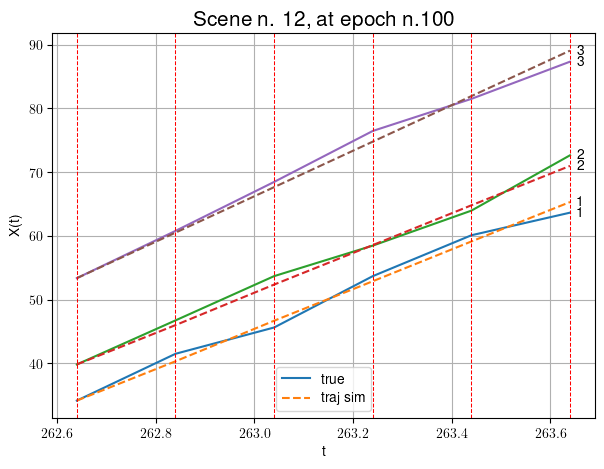


Scene n. 13, time interval:        [314.84,315.64]


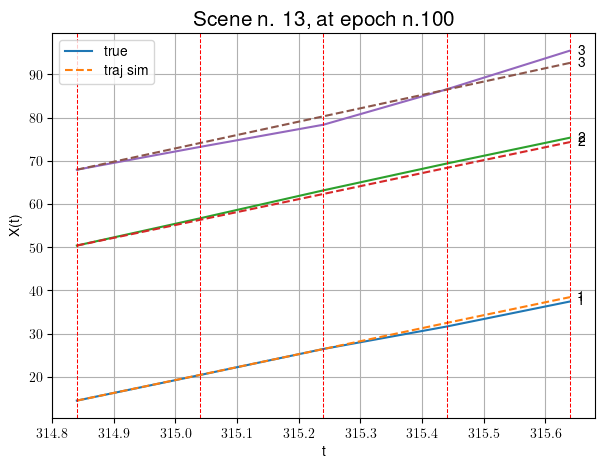


Scene n. 14, time interval:        [325.24,326.44]


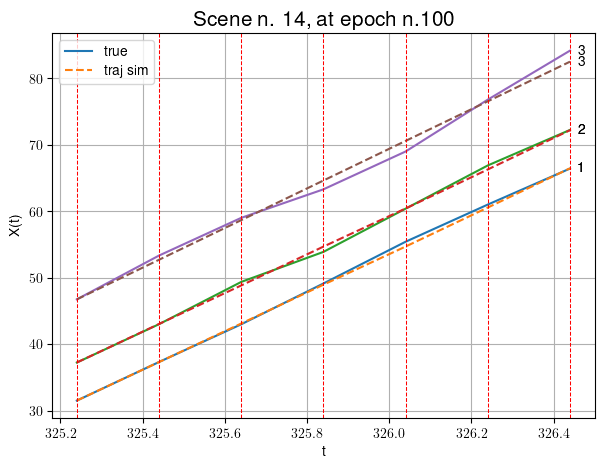


Scene n. 15, time interval:        [354.04,354.64]


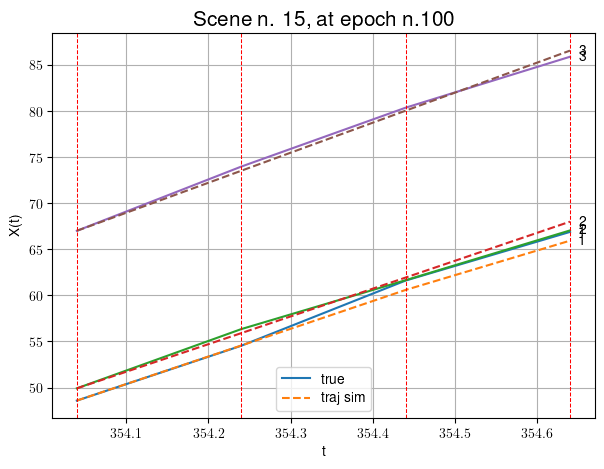


Scene n. 16, time interval:        [363.44,364.04]


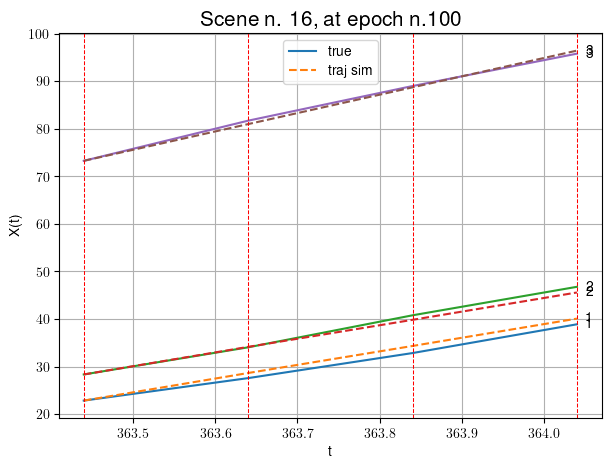


Scene n. 17, time interval:        [386.64,387.44]


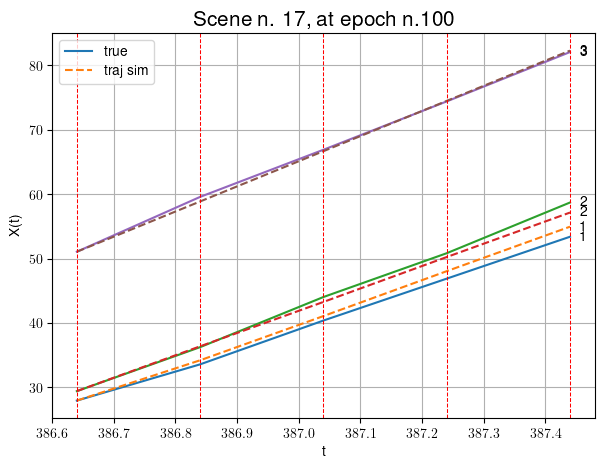


Scene n. 18, time interval:        [431.84,432.24]


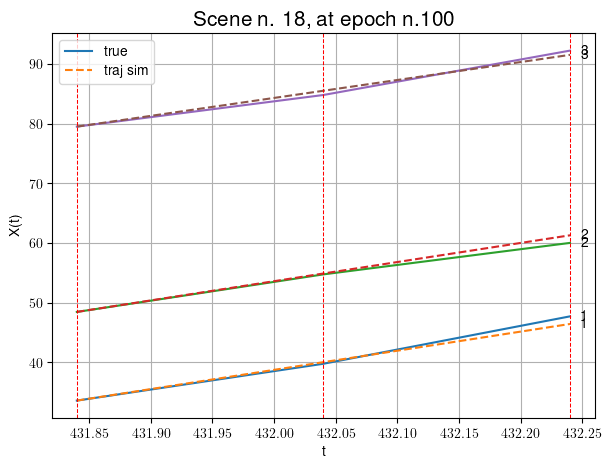


Scene n. 19, time interval:        [446.24,446.84]


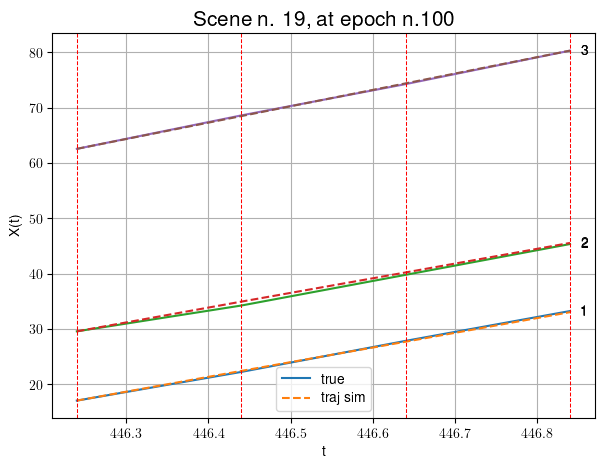


Scene n. 20, time interval:        [447.44,448.04]


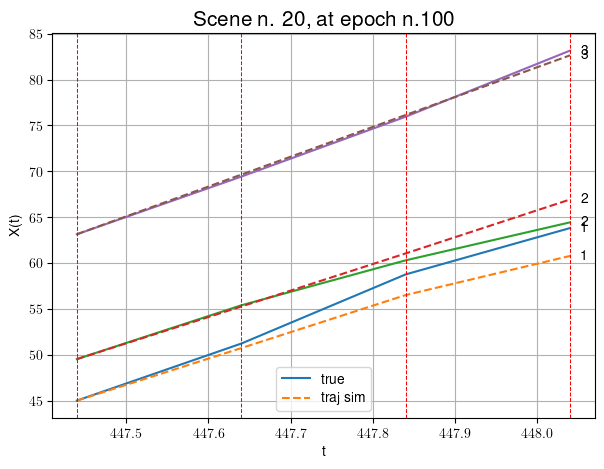


Scene n. 21, time interval:        [495.84,496.24]


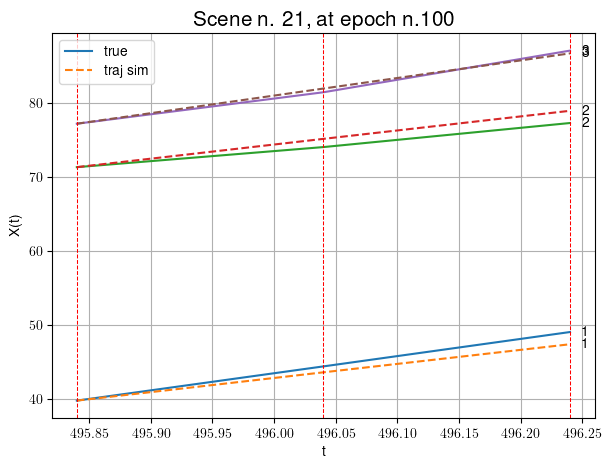


Scene n. 22, time interval:        [496.84,497.64]


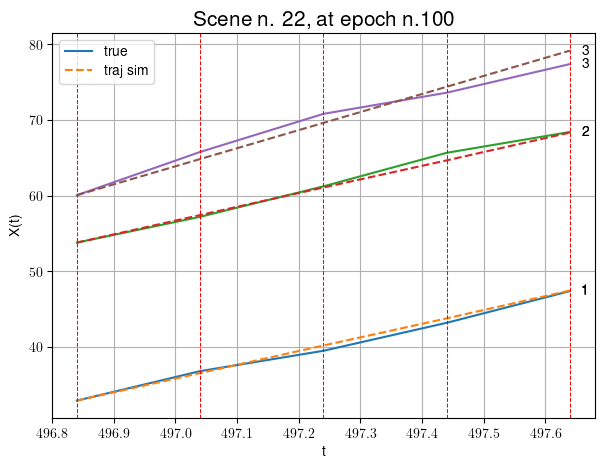


Scene n. 23, time interval:        [499.04,499.44]


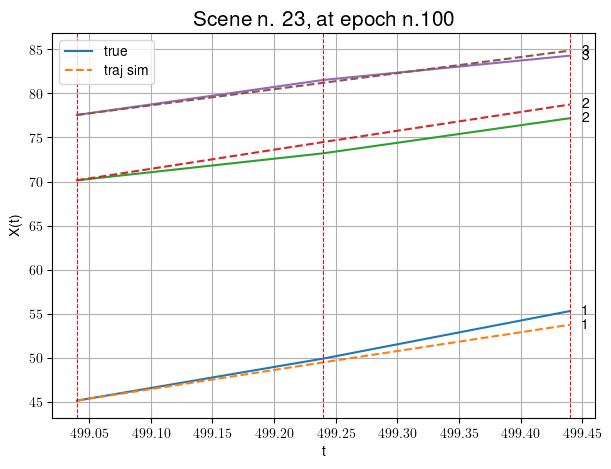


Scene n. 24, time interval:        [500.64,501.04]


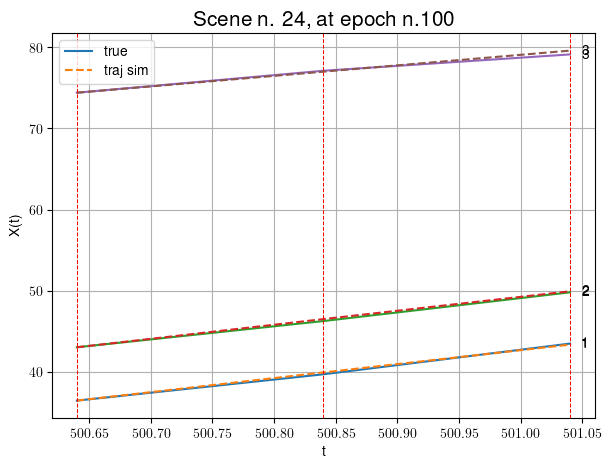


Scene n. 25, time interval:        [502.24,503.04]


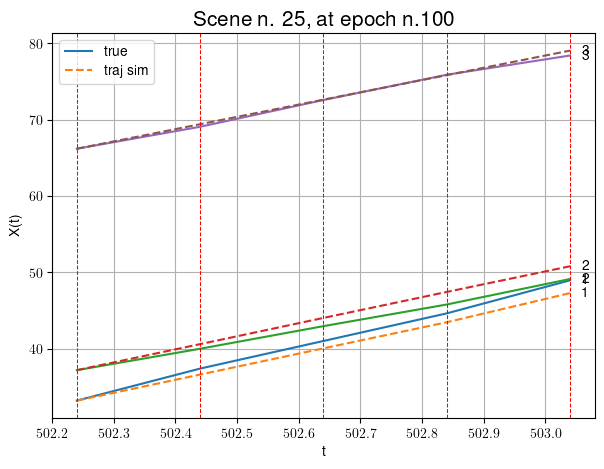


Scene n. 26, time interval:        [534.84,535.24]


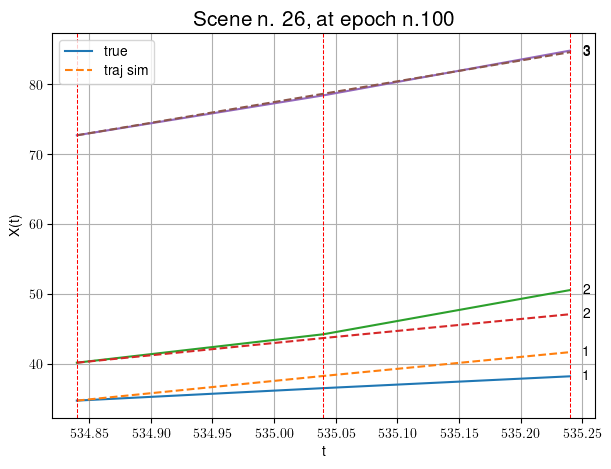


Scene n. 27, time interval:        [573.84,574.44]


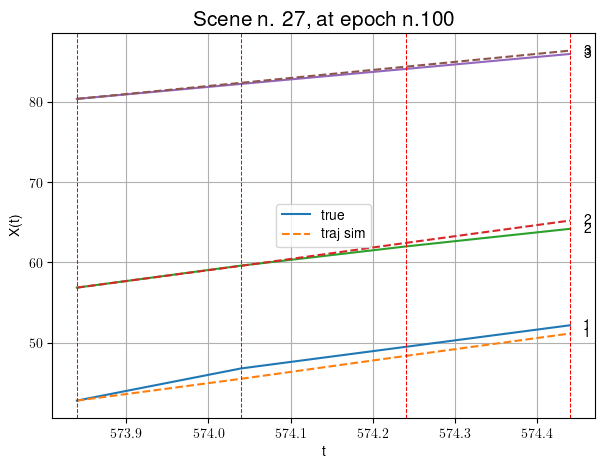

In [8]:
info_df = solve_nn_df(df)

In [9]:
info_df

[[0, 28.31549949600715],
 [1, 30.84407442198709],
 [2, 28.753522821058915],
 [3, 29.639660875837965],
 [4, 28.890331289215254],
 [5, 28.305079474113235],
 [6, 33.35786358705459],
 [7, 31.73376528190689],
 [8, 35.333296440841714],
 [9, 33.4576413092258],
 [10, 32.38364205394561],
 [11, 28.20047910476419],
 [12, 34.226782088409],
 [13, 30.660088273278856],
 [14, 29.86034517360984],
 [15, 31.919531994631864],
 [16, 36.35930650929943],
 [17, 36.66047544625665],
 [18, 30.059977584369566],
 [19, 29.6824650646817],
 [20, 31.842094194812898],
 [21, 25.41275430554473],
 [22, 25.489669386566163],
 [23, 21.3286210638983],
 [24, 17.429873588238678],
 [25, 19.72434680193357],
 [26, 29.824319804702593],
 [27, 15.275789054406765]]

In [10]:
for nscn, v0_scn_mean in info_df:
    print(f"Scene n.{nscn}: v0 mean is {v0_scn_mean}")

Scene n.0: v0 mean is 28.31549949600715
Scene n.1: v0 mean is 30.84407442198709
Scene n.2: v0 mean is 28.753522821058915
Scene n.3: v0 mean is 29.639660875837965
Scene n.4: v0 mean is 28.890331289215254
Scene n.5: v0 mean is 28.305079474113235
Scene n.6: v0 mean is 33.35786358705459
Scene n.7: v0 mean is 31.73376528190689
Scene n.8: v0 mean is 35.333296440841714
Scene n.9: v0 mean is 33.4576413092258
Scene n.10: v0 mean is 32.38364205394561
Scene n.11: v0 mean is 28.20047910476419
Scene n.12: v0 mean is 34.226782088409
Scene n.13: v0 mean is 30.660088273278856
Scene n.14: v0 mean is 29.86034517360984
Scene n.15: v0 mean is 31.919531994631864
Scene n.16: v0 mean is 36.35930650929943
Scene n.17: v0 mean is 36.66047544625665
Scene n.18: v0 mean is 30.059977584369566
Scene n.19: v0 mean is 29.6824650646817
Scene n.20: v0 mean is 31.842094194812898
Scene n.21: v0 mean is 25.41275430554473
Scene n.22: v0 mean is 25.489669386566163
Scene n.23: v0 mean is 21.3286210638983
Scene n.24: v0 mean i

In [11]:
v0_list = [l[1] for l in info_df]
np.array(v0_list).mean()

29.10611773180711